# Evaluation of feature selection results

## Importing some packages

In [131]:
import os.path
import numpy as np
import pandas as pd

from scipy.stats import ttest_ind, ttest_rel
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from statsmodels.stats.contingency_tables import mcnemar

from config import *

## Loading the results

In [132]:
results= pd.read_csv('feature_selection_rankings.csv')
runtimes= pd.read_csv('feature_selection_runtimes.csv')

## The analysis

In [133]:
results

,Unnamed: 0,mi_3,mi_7,mi_11,mi_21,mi_31,eqw_2,eqf_2,kmeans_2,distortion_aligned_2,...,kmeans_square-root,distortion_aligned_square-root,eqw_sturges-formula,eqf_sturges-formula,kmeans_sturges-formula,distortion_aligned_sturges-formula,eqw_rice-rule,eqf_rice-rule,kmeans_rice-rule,distortion_aligned_rice-rule
0,airfoil,1.305000,1.207500,1.132500,1.117500,1.157500,1.150000,2.540000,1.142500,1.117500,...,1.087500,1.100000,1.105000,2.182500,1.100000,1.100000,1.105000,2.100000,1.100000,1.102500
1,cpu_performance,2.300000,2.168333,2.275000,2.340000,2.300000,2.383333,4.250000,2.461667,2.390000,...,2.445000,2.386667,2.510000,4.056667,2.400000,2.368333,2.510000,3.718333,2.443333,2.363333
2,forestfires,8.426471,9.290000,9.506471,9.160000,8.481765,9.896471,8.305882,9.913529,12.531176,...,10.330000,8.659412,10.180000,8.028824,9.752353,9.747059,10.180000,7.370588,9.714118,9.229412
3,real_estate_valuation,3.156000,3.056000,3.002000,2.956000,2.908000,3.180000,4.220000,2.262000,2.412000,...,2.706000,2.660000,2.712000,3.556000,2.628000,2.684000,2.708000,3.384000,2.592000,2.650000
4,slump_test,3.791250,3.170000,3.550000,3.805000,4.136250,3.101250,5.795000,3.087500,3.323750,...,3.543750,3.643750,3.370000,4.695000,3.615000,3.508750,3.960000,4.480000,3.543750,3.643750
5,stock_portfolio_performance,2.202000,2.294000,2.216000,2.134000,2.060000,2.072000,2.690000,2.062000,2.064000,...,2.026000,2.064000,2.126000,2.708000,2.082000,2.150000,2.120000,2.698000,2.090000,2.164000
6,winequality_red,1.950000,1.756000,1.829000,1.800000,1.757000,1.673000,3.781000,1.673000,1.922000,...,1.725000,1.725000,1.880000,3.706000,1.880000,1.761000,1.880000,3.706000,1.880000,1.761000
7,winequality_white,2.955000,3.063000,3.417000,3.550000,3.319000,1.685000,4.853000,1.685000,3.256000,...,1.678000,1.678000,1.742000,4.066000,1.715000,1.715000,1.742000,4.066000,1.715000,1.715000
8,yacht_hydrodynamics,2.556000,2.556000,2.556000,2.558000,2.460000,2.644000,5.518000,2.478000,2.472000,...,2.112000,2.152000,2.170000,5.556000,2.226000,2.240000,2.200000,5.532000,2.144000,2.176000
9,diabetes,1.650000,1.680000,1.620000,1.520000,1.590000,1.640000,1.460000,1.710000,1.700000,...,1.750000,1.770000,1.750000,1.530000,1.810000,1.720000,1.770000,1.530000,1.810000,1.720000


In [134]:
results.columns

Index(['Unnamed: 0', 'mi_3', 'mi_7', 'mi_11', 'mi_21', 'mi_31', 'eqw_2',
       'eqf_2', 'kmeans_2', 'distortion_aligned_2', 'eqw_5', 'eqf_5',
       'kmeans_5', 'distortion_aligned_5', 'eqw_square-root',
       'eqf_square-root', 'kmeans_square-root',
       'distortion_aligned_square-root', 'eqw_sturges-formula',
       'eqf_sturges-formula', 'kmeans_sturges-formula',
       'distortion_aligned_sturges-formula', 'eqw_rice-rule', 'eqf_rice-rule',
       'kmeans_rice-rule', 'distortion_aligned_rice-rule'],
      dtype='object')

In [135]:
multiindex= pd.MultiIndex.from_tuples([('', 'database'), ('MI', 3), ('MI', 7), ('MI', 11), ('MI', 21), ('MI', 31), ('EQW', 2), ('EQF', 2), ('kmeans', 2), ('DA', 2), ('EQW', 5), ('EQF', 5), ('kmeans', 5), ('DA', 5), ('EQW', 'square-root'), ('EQF', 'square-root'), ('kmeans', 'square-root'), ('DA', 'square-root'), ('EQW', 'Struges-form.'), ('EQF', 'Struges-form.'), ('kmeans', 'Struges-form.'), ('DA', 'Struges-form.'), ('EQW', 'Rice-rule'), ('EQF', 'Rice-rule'), ('kmeans', 'Rice-rule'), ('DA', 'Rice-rule')])

In [136]:
results.columns=multiindex

In [137]:
results= results[[('', 'database'), ('MI', 3), ('MI', 7), ('MI', 11), ('MI', 21), ('MI', 31), ('EQW', 2), ('EQW', 5), ('EQW', 'square-root'), ('EQW', 'Struges-form.'),('EQW', 'Rice-rule'), ('EQF', 2), ('EQF', 5), ('EQF', 'square-root'), ('EQF', 'Struges-form.'), ('EQF', 'Rice-rule'), ('kmeans', 2), ('kmeans', 5), ('kmeans', 'square-root'), ('kmeans', 'Struges-form.'), ('kmeans', 'Rice-rule'), ('DA', 2), ('DA', 5), ('DA', 'square-root'), ('DA', 'Struges-form.'), ('DA', 'Rice-rule')]]

In [138]:
results

MI                                  \
                       database         3         7         11         21   
0                       airfoil  1.305000  1.207500   1.132500   1.117500   
1               cpu_performance  2.300000  2.168333   2.275000   2.340000   
2                   forestfires  8.426471  9.290000   9.506471   9.160000   
3         real_estate_valuation  3.156000  3.056000   3.002000   2.956000   
4                    slump_test  3.791250  3.170000   3.550000   3.805000   
5   stock_portfolio_performance  2.202000  2.294000   2.216000   2.134000   
6               winequality_red  1.950000  1.756000   1.829000   1.800000   
7             winequality_white  2.955000  3.063000   3.417000   3.550000   
8           yacht_hydrodynamics  2.556000  2.556000   2.556000   2.558000   
9                      diabetes  1.650000  1.680000   1.620000   1.520000   
10                        laser  1.756667  1.756667   1.756667   1.756667   
11                     autoMPG6  2.170000  2.125000   2.212500   2.075000   
12                       wizmir  2.582500  2.231250   2.155000   2.148750   
13                      wankara  2.012500  1.818750   1.833750   1.848750   
14                     mortgage  3.463571  3.708571   3.615714   4.222857   
15                     baseball  4.199333  4.212667   3.868000   3.474667   
16                        ele_1  1.000000  1.000000   1.000000   1.000000   
17                     treasury  3.748571  2.661429   2.607857   2.654286   
18                    compactiv  4.219500  4.518500   4.665000   4.920500   
19                      puma32h  9.024516  9.480968  10.186452  11.073226   

                     EQW                                       ...     kmeans  \
           31          2          5 square-root Struges-form.  ...          2   
0    1.157500   1.150000   1.095000    1.105000      1.105000  ...   1.142500   
1    2.300000   2.383333   2.423333    2.510000      2.510000  ...   2.461667   
2    8.481765   9.896471  10.071765   10.180000     10.180000  ...   9.913529   
3    2.908000   3.180000   2.318000    2.708000      2.712000  ...   2.262000   
4    4.136250   3.101250   3.426250    3.960000      3.370000  ...   3.087500   
5    2.060000   2.072000   2.042000    2.044000      2.126000  ...   2.062000   
6    1.757000   1.673000   1.827000    2.061000      1.880000  ...   1.673000   
7    3.319000   1.685000   1.696000    1.851000      1.742000  ...   1.685000   
8    2.460000   2.644000   2.664000    2.226000      2.170000  ...   2.478000   
9    1.590000   1.640000   1.500000    1.530000      1.750000  ...   1.710000   
10   1.756667   1.756667   1.756667    1.756667      1.756667  ...   1.756667   
11   2.072500   2.030000   2.117500    2.170000      2.072500  ...   2.040000   
12   2.172500   2.297500   1.992500    2.073750      2.023750  ...   2.142500   
13   1.857500   2.012500   1.950000    1.875000      1.870000  ...   1.980000   
14   4.400000   3.360000   3.385714    3.606429      3.376429  ...   3.527143   
15   3.549333   5.175333   4.888000    3.144667      3.232000  ...   4.984000   
16   1.000000   1.000000   1.000000    1.000000      1.000000  ...   1.000000   
17   2.684286   3.522143   4.037143    4.030000      3.889286  ...   3.747857   
18   4.996500   4.424000   3.618000    3.907000      3.907000  ...   4.094000   
19  10.826452  14.296774   9.890323    8.527742     10.141613  ...  13.924194   

                                                          DA             \
            5 square-root Struges-form. Rice-rule          2          5   
0    1.100000    1.087500      1.100000  1.100000   1.117500   1.102500   
1    2.398333    2.445000      2.400000  2.443333   2.390000   2.370000   
2    9.580000   10.330000      9.752353  9.714118  12.531176  10.633529   
3    2.512000    2.706000      2.628000  2.592000   2.412000   2.298000   
4    3.456250    3.543750      3.615000  3.543750   3.323750   3.536250   
5    2.004000    2.026000      2.082

In [139]:
for c in results.columns[1:]:
    results[c]= results[c].apply(lambda x: np.round(x, 1))

In [140]:
results

MI                          EQW        \
                       database    3    7    11    21    31     2     5   
0                       airfoil  1.3  1.2   1.1   1.1   1.2   1.2   1.1   
1               cpu_performance  2.3  2.2   2.3   2.3   2.3   2.4   2.4   
2                   forestfires  8.4  9.3   9.5   9.2   8.5   9.9  10.1   
3         real_estate_valuation  3.2  3.1   3.0   3.0   2.9   3.2   2.3   
4                    slump_test  3.8  3.2   3.6   3.8   4.1   3.1   3.4   
5   stock_portfolio_performance  2.2  2.3   2.2   2.1   2.1   2.1   2.0   
6               winequality_red  2.0  1.8   1.8   1.8   1.8   1.7   1.8   
7             winequality_white  3.0  3.1   3.4   3.6   3.3   1.7   1.7   
8           yacht_hydrodynamics  2.6  2.6   2.6   2.6   2.5   2.6   2.7   
9                      diabetes  1.6  1.7   1.6   1.5   1.6   1.6   1.5   
10                        laser  1.8  1.8   1.8   1.8   1.8   1.8   1.8   
11                     autoMPG6  2.2  2.1   2.2   2.1   2.1   2.0   2.1   
12                       wizmir  2.6  2.2   2.2   2.1   2.2   2.3   2.0   
13                      wankara  2.0  1.8   1.8   1.8   1.9   2.0   2.0   
14                     mortgage  3.5  3.7   3.6   4.2   4.4   3.4   3.4   
15                     baseball  4.2  4.2   3.9   3.5   3.5   5.2   4.9   
16                        ele_1  1.0  1.0   1.0   1.0   1.0   1.0   1.0   
17                     treasury  3.7  2.7   2.6   2.7   2.7   3.5   4.0   
18                    compactiv  4.2  4.5   4.7   4.9   5.0   4.4   3.6   
19                      puma32h  9.0  9.5  10.2  11.1  10.8  14.3   9.9   

                              ... kmeans                                  \
   square-root Struges-form.  ...      2     5 square-root Struges-form.   
0          1.1           1.1  ...    1.1   1.1         1.1           1.1   
1          2.5           2.5  ...    2.5   2.4         2.4           2.4   
2         10.2          10.2  ...    9.9   9.6        10.3           9.8   
3          2.7           2.7  ...    2.3   2.5         2.7           2.6   
4          4.0           3.4  ...    3.1   3.5         3.5           3.6   
5          2.0           2.1  ...    2.1   2.0         2.0           2.1   
6          2.1           1.9  ...    1.7   1.9         1.7           1.9   
7          1.9           1.7  ...    1.7   1.7         1.7           1.7   
8          2.2           2.2  ...    2.5   2.4         2.1           2.2   
9          1.5           1.8  ...    1.7   1.8         1.8           1.8   
10         1.8           1.8  ...    1.8   1.8         1.8           1.8   
11         2.2           2.1  ...    2.0   2.1         2.1           2.2   
12         2.1           2.0  ...    2.1   2.1         2.1           2.1   
13         1.9           1.9  ...    2.0   1.9         1.9           1.9   
14         3.6           3.4  ...    3.5   4.0         3.6           3.8   
15         3.1           3.2  ...    5.0   3.3         3.3           3.3   
16         1.0           1.0  ...    1.0   1.0         1.0           1.0   
17         4.0           3.9  ...    3.7   3.9         3.9           4.1   
18         3.9           3.9  ...    4.1   3.2         2.9           3.0   
19         8.5          10.1  ...   13.9  13.2         9.0           9.3   

                DA                                            
   Rice-rule     2     5 square-root Struges-form. Rice-rule  
0        1.1   1.1   1.1         1.1           1.1       1.1  
1        2.4   2.4   2.4         2.4           2.4       2.4  
2        9.7  12.5  10.6         8.7           9.7       9.2  
3        2.6   2.4   2.3         2.7           2.7       2.6  
4        3.5   3.3   3.5         3.6           3.5       3.6  
5        2.1   2.1   2.1         2.1           2.2       2.2  
6        1.9   1.9   1.7         1.7           1.8       1.8  
7        1.7   3.3   1.9         1.7           1.7       1.7  
8        2.1   2.5   2.4         2.2           2.2       2.2  
9        1.8   1.

In [141]:
tmp= results.mean().reset_index(drop=False)

In [142]:
tmp

,level_0,level_1,0
0,MI,3,3.230
1,MI,7,3.200
2,MI,11,3.255
3,MI,21,3.310
4,MI,31,3.285
5,EQW,2,3.470
6,EQW,5,3.185
7,EQW,square-root,3.115
8,EQW,Struges-form.,3.145
9,EQW,Rice-rule,3.180


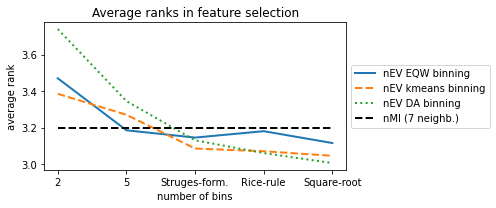

In [163]:
plt.figure(figsize=(7, 3))

tmp1= tmp[tmp['level_0'] == 'EQW']
tmp1= tmp1.iloc[[0, 1, 3, 4, 2]]
plt.plot(np.arange(len(tmp1)), tmp1[0], label='nEV EQW binning', linestyle='-', linewidth=2.0)
#tmp1= tmp[tmp['level_0'] == 'EQF']
#plt.plot(np.arange(len(tmp1)), tmp1[0], label='nEV EQF binning', linestyle='-', linewidth=2.0)
tmp1= tmp[tmp['level_0'] == 'kmeans']
tmp1= tmp1.iloc[[0, 1, 3, 4, 2]]
plt.plot(np.arange(len(tmp1)), tmp1[0], label='nEV kmeans binning', linestyle='dashed', linewidth=2.0)
tmp1= tmp[tmp['level_0'] == 'DA']
tmp1= tmp1.iloc[[0, 1, 3, 4, 2]]
plt.plot(np.arange(len(tmp1)), tmp1[0], label='nEV DA binning', linestyle='dotted', linewidth=2.0)
tmp1= tmp[(tmp['level_0'] == 'MI') & (tmp['level_1'] == 7)]
plt.plot(np.arange(5), np.repeat(tmp1[0], 5), label='nMI (7 neighb.)', linestyle='dashed', linewidth=2.0, color='black')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('number of bins')
plt.ylabel('average rank')
plt.title('Average ranks in feature selection')
plt.xticks(np.arange(5), ['2', '5', 'Struges-form.', 'Rice-rule', 'Square-root'])
plt.tight_layout()
plt.savefig('fs_results.pdf')

In [144]:
results

MI                          EQW        \
                       database    3    7    11    21    31     2     5   
0                       airfoil  1.3  1.2   1.1   1.1   1.2   1.2   1.1   
1               cpu_performance  2.3  2.2   2.3   2.3   2.3   2.4   2.4   
2                   forestfires  8.4  9.3   9.5   9.2   8.5   9.9  10.1   
3         real_estate_valuation  3.2  3.1   3.0   3.0   2.9   3.2   2.3   
4                    slump_test  3.8  3.2   3.6   3.8   4.1   3.1   3.4   
5   stock_portfolio_performance  2.2  2.3   2.2   2.1   2.1   2.1   2.0   
6               winequality_red  2.0  1.8   1.8   1.8   1.8   1.7   1.8   
7             winequality_white  3.0  3.1   3.4   3.6   3.3   1.7   1.7   
8           yacht_hydrodynamics  2.6  2.6   2.6   2.6   2.5   2.6   2.7   
9                      diabetes  1.6  1.7   1.6   1.5   1.6   1.6   1.5   
10                        laser  1.8  1.8   1.8   1.8   1.8   1.8   1.8   
11                     autoMPG6  2.2  2.1   2.2   2.1   2.1   2.0   2.1   
12                       wizmir  2.6  2.2   2.2   2.1   2.2   2.3   2.0   
13                      wankara  2.0  1.8   1.8   1.8   1.9   2.0   2.0   
14                     mortgage  3.5  3.7   3.6   4.2   4.4   3.4   3.4   
15                     baseball  4.2  4.2   3.9   3.5   3.5   5.2   4.9   
16                        ele_1  1.0  1.0   1.0   1.0   1.0   1.0   1.0   
17                     treasury  3.7  2.7   2.6   2.7   2.7   3.5   4.0   
18                    compactiv  4.2  4.5   4.7   4.9   5.0   4.4   3.6   
19                      puma32h  9.0  9.5  10.2  11.1  10.8  14.3   9.9   

                              ... kmeans                                  \
   square-root Struges-form.  ...      2     5 square-root Struges-form.   
0          1.1           1.1  ...    1.1   1.1         1.1           1.1   
1          2.5           2.5  ...    2.5   2.4         2.4           2.4   
2         10.2          10.2  ...    9.9   9.6        10.3           9.8   
3          2.7           2.7  ...    2.3   2.5         2.7           2.6   
4          4.0           3.4  ...    3.1   3.5         3.5           3.6   
5          2.0           2.1  ...    2.1   2.0         2.0           2.1   
6          2.1           1.9  ...    1.7   1.9         1.7           1.9   
7          1.9           1.7  ...    1.7   1.7         1.7           1.7   
8          2.2           2.2  ...    2.5   2.4         2.1           2.2   
9          1.5           1.8  ...    1.7   1.8         1.8           1.8   
10         1.8           1.8  ...    1.8   1.8         1.8           1.8   
11         2.2           2.1  ...    2.0   2.1         2.1           2.2   
12         2.1           2.0  ...    2.1   2.1         2.1           2.1   
13         1.9           1.9  ...    2.0   1.9         1.9           1.9   
14         3.6           3.4  ...    3.5   4.0         3.6           3.8   
15         3.1           3.2  ...    5.0   3.3         3.3           3.3   
16         1.0           1.0  ...    1.0   1.0         1.0           1.0   
17         4.0           3.9  ...    3.7   3.9         3.9           4.1   
18         3.9           3.9  ...    4.1   3.2         2.9           3.0   
19         8.5          10.1  ...   13.9  13.2         9.0           9.3   

                DA                                            
   Rice-rule     2     5 square-root Struges-form. Rice-rule  
0        1.1   1.1   1.1         1.1           1.1       1.1  
1        2.4   2.4   2.4         2.4           2.4       2.4  
2        9.7  12.5  10.6         8.7           9.7       9.2  
3        2.6   2.4   2.3         2.7           2.7       2.6  
4        3.5   3.3   3.5         3.6           3.5       3.6  
5        2.1   2.1   2.1         2.1           2.2       2.2  
6        1.9   1.9   1.7         1.7           1.8       1.8  
7        1.7   3.3   1.9         1.7           1.7       1.7  
8        2.1   2.5   2.4         2.2           2.2       2.2  
9        1.8   1.

In [146]:
from scipy.stats import ranksums, wilcoxon

In [147]:
eqw= results['EQW']['square-root'].values.flatten() 
da= results['DA']['square-root'].values.flatten()
kmeans= results['kmeans']['square-root'].values.flatten()

In [148]:
eqw= results['EQW'][['Struges-form.', 'Rice-rule', 'square-root']].values.flatten() 
da= results['DA'][['Struges-form.', 'Rice-rule', 'square-root']].values.flatten()
kmeans= results['kmeans'][['Struges-form.', 'Rice-rule', 'square-root']].values.flatten()

In [150]:
eqw= results['EQW'][['Rice-rule', 'square-root']].values.flatten() 
da= results['DA'][['Rice-rule', 'square-root']].values.flatten()
kmeans= results['kmeans'][['Rice-rule', 'square-root']].values.flatten()
nMI= results['MI'][7].values.flatten()

da_sq= results['DA'][['square-root']].values.flatten()
kmeans_sq= results['kmeans'][['square-root']].values.flatten()

In [151]:
eqw.mean(), da.mean(), kmeans.mean(), nMI.mean()

(3.1475, 3.0324999999999998, 3.0575, 3.2)

In [152]:
wilcoxon(eqw, da)

WilcoxonResult(statistic=79.5, pvalue=0.0421869979038477)

In [153]:
wilcoxon(eqw, kmeans)

WilcoxonResult(statistic=85.5, pvalue=0.10761234848820779)

In [159]:
wilcoxon(nMI, da_sq)

/home/gykovacs/anaconda3/envs/nev_test/lib/python3.7/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=36.0, pvalue=0.09742797748123776)

In [161]:
wilcoxon(nMI, kmeans_sq)

/home/gykovacs/anaconda3/envs/nev_test/lib/python3.7/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=50.5, pvalue=0.21756164227082675)